<a href="https://colab.research.google.com/github/rposhala/Recommender-System-on-MovieLens-dataset/blob/main/Item_based_Collaborative_Recommender_System_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv

## Loading MovieLens dataset

In [2]:
df_tags = pd.read_csv("../data/tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [3]:
len(df_tags), max(df_tags['movieId']),min(df_tags['movieId']), max(df_tags['userId']), min(df_tags['userId'])

(465564, 131258, 1, 138472, 18)

In [4]:
df_ratings = pd.read_csv("../data/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
len(df_ratings), max(df_ratings['rating']),min(df_ratings['rating']), max(df_ratings['userId']), min(df_ratings['userId'])

(20000263, 5.0, 0.5, 138493, 1)

In [6]:
df_movies = pd.read_csv("../data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
len(df_movies)

27278

## Merging required datasets

In [8]:
merged_df = pd.merge(df_ratings, df_movies, how='inner', on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [9]:
len(merged_df)

20000263

## Exploratory data analysis

Example of a multiple rating scenario by a specific movie:

In [10]:
merged_df[(merged_df['title'] == 'Chasing Amy (1997)') ]

,userId,movieId,rating,timestamp,title,genres
11411443,21,1639,3.0,992190290,Chasing Amy (1997),Comedy|Drama|Romance
11411444,23,1639,3.0,914457720,Chasing Amy (1997),Comedy|Drama|Romance
11411445,24,1639,5.0,994230323,Chasing Amy (1997),Comedy|Drama|Romance
11411446,33,1639,5.0,966285369,Chasing Amy (1997),Comedy|Drama|Romance
11411447,40,1639,1.0,941626558,Chasing Amy (1997),Comedy|Drama|Romance
...,...,...,...,...,...,...
11425371,138444,1639,3.0,940033447,Chasing Amy (1997),Comedy|Drama|Romance
11425372,138449,1639,4.0,996910792,Chasing Amy (1997),Comedy|Drama|Romance
11425373,138459,1639,3.5,1249438614,Chasing Amy (1997),Comedy|Drama|Romance
11425374,138467,1639,4.0,951848803,Chasing Amy (1997),Comedy|Drama|Romance


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ GB


In [12]:
my_report = sv.analyze(merged_df)
my_report.show_html('../reports/EDA_complete_report_sweet_viz.html') # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report ../reports/EDA_complete_report_sweet_viz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
refined_dataset = merged_df.groupby(by=['userId','title','movieId'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,userId,title,movieId,rating
0,1,2001: A Space Odyssey (1968),924,3.5
1,1,28 Days Later (2002),6502,3.5
2,1,"7th Voyage of Sinbad, The (1958)",3153,4.0
3,1,"Adventures of Baron Munchausen, The (1988)",4467,4.0
4,1,Alien (1979),1214,4.0


In [14]:
refined_dataset[(refined_dataset['title'] == 'Chasing Amy (1997)') ]

,userId,title,movieId,rating
2163,21,Chasing Amy (1997),1639,3.0
2449,23,Chasing Amy (1997),1639,3.0
2625,24,Chasing Amy (1997),1639,5.0
3865,33,Chasing Amy (1997),1639,5.0
4342,40,Chasing Amy (1997),1639,1.0
...,...,...,...,...
19993940,138444,Chasing Amy (1997),1639,3.0
19994290,138449,Chasing Amy (1997),1639,4.0
19995938,138459,Chasing Amy (1997),1639,3.5
19996719,138467,Chasing Amy (1997),1639,4.0


In [15]:
refined_dataset.head(20)

,userId,title,movieId,rating
0,1,2001: A Space Odyssey (1968),924,3.5
1,1,28 Days Later (2002),6502,3.5
2,1,"7th Voyage of Sinbad, The (1958)",3153,4.0
3,1,"Adventures of Baron Munchausen, The (1988)",4467,4.0
4,1,Alien (1979),1214,4.0
5,1,Aliens (1986),1200,4.0
6,1,"American Werewolf in London, An (1981)",1321,4.0
7,1,Apocalypse Now (1979),1208,3.5
8,1,Army of Darkness (1993),1215,4.0
9,1,Austin Powers: The Spy Who Shagged Me (1999),2683,3.5


In [16]:
refined_dataset.to_csv('../data/refined_dataset.csv', encoding='utf-8')

In [17]:
refined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   title    object 
 2   movieId  int64  
 3   rating   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [18]:
num_users = len(refined_dataset['userId'].value_counts())
print(num_users)
num_items = len(refined_dataset['title'].value_counts())
print(num_items)

138493
26729


In [19]:
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 138493
Unique number of movies in the dataset: 26729


In [20]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [21]:
sum_column_rating_count_df = rating_count_df.sum(axis=0)
sum_column_rating_count_df

count    20000263
dtype: int64

Text(0, 0.5, 'number of ratings')

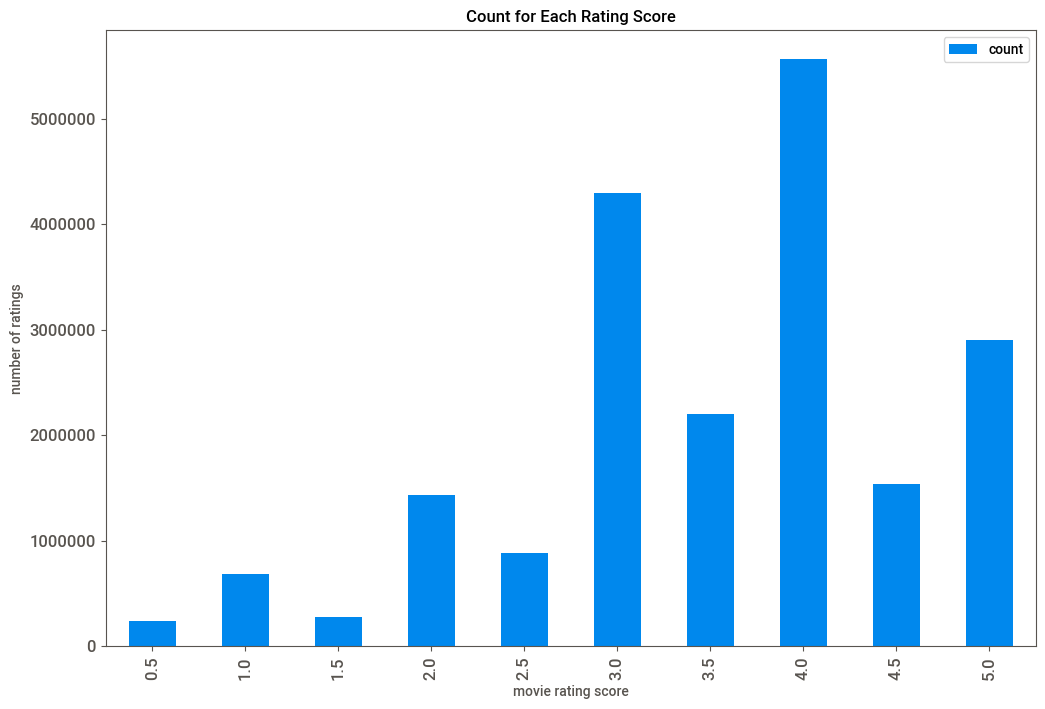

In [22]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")